In [1]:
!pip install nltk

In [2]:
import nltk

In [3]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\p\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [4]:
import collections
import nltk

data = """Government of the people, by the people, 
for the people, shall not perish from the Earth"""

word_freqs = collections.Counter()
words = nltk.word_tokenize(data.lower())
for word in words:
    word_freqs[word] += 1
print(word_freqs)

Counter({'the': 4, 'people': 3, ',': 3, 'government': 1, 'of': 1, 'by': 1, 'for': 1, 'shall': 1, 'not': 1, 'perish': 1, 'from': 1, 'earth': 1})


In [1]:
# -*- coding: utf-8 -*-
from keras.layers.core import Activation, Dense, Dropout, SpatialDropout1D
from keras.layers.embeddings import Embedding
from keras.layers.recurrent import LSTM
from keras.models import Sequential
from keras.preprocessing import sequence
from sklearn.model_selection import train_test_split
import collections
import matplotlib.pyplot as plt
import nltk
import numpy as np
import os

DATA_DIR = "./data"

EMBEDDING_SIZE = 128
HIDDEN_LAYER_SIZE = 64
BATCH_SIZE = 32
NUM_EPOCHS = 10

# 학습 데이터를 읽고 사전을 만든다.
maxlen = 0
word_freqs = collections.Counter()
num_recs = 0
ftrain = open(os.path.join(DATA_DIR, "umich-sentiment-train.txt"), 'r',encoding='utf8')
for line in ftrain:
    label, sentence = line.strip().split("\t")
    words = nltk.word_tokenize(sentence.lower())
    if len(words) > maxlen:
        maxlen = len(words)
    for word in words:
        word_freqs[word] += 1
    num_recs += 1
ftrain.close()



C:\Users\p\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
print(sentence)

Oh, and Brokeback Mountain was a terrible movie.


In [8]:
print(word_freqs)

Counter({'i': 4705, ',': 4194, '.': 3558, 'the': 3221, 'and': 2150, '!': 2131, 'harry': 2088, 'vinci': 2001, 'da': 1998, 'brokeback': 1996, 'code': 1986, 'mountain': 1982, 'potter': 1817, '...': 1685, 'love': 1542, 'is': 1521, 'a': 1305, 'was': 1179, 'mission': 1090, 'impossible': 1089, 'awesome': 1028, 'like': 974, 'it': 897, 'to': 808, 'movie': 777, 'that': 718, "'s": 629, 'because': 608, 'sucks': 592, 'hate': 578, 'sucked': 509, 'so': 506, 'as': 473, 'my': 462, '``': 449, 'much': 446, 'of': 424, 'really': 374, 'movies': 366, 'stupid': 365, 'you': 329, 'down': 322, 'but': 295, 'we': 295, 'be': 290, 'with': 288, 'just': 287, 'one': 283, 'know': 276, 'potter..': 276, 'suck': 273, 'out': 269, '3': 267, 'who': 263, '/': 263, 'or': 263, 'am': 259, 'loved': 256, 'want': 254, 'into': 253, 'which': 251, 'right': 249, 'for': 241, 'an': 225, "n't": 223, 'this': 213, 'me': 212, ':': 207, 'are': 203, 'think': 202, 'not': 198, 'how': 197, 'if': 195, 'depressing': 188, 'people': 183, 'his': 182, '

In [62]:
vocab_size = len(word_freqs) + 2
word2index = {x[0]: i+2 for i, x in 
                enumerate(word_freqs.most_common(vocab_size))}
word2index["PAD"] = 0
word2index["UNK"] = 1
index2word = {v:k for k, v in word2index.items()}

print(vocab_size)

2330


In [ ]:
# 문장을 시퀀스로 변환
X = np.empty((num_recs, ), dtype=list)
y = np.zeros((num_recs, ))
i = 0
ftrain = open(os.path.join(DATA_DIR, "umich-sentiment-train.txt"), 'r')
for line in ftrain:
    label, sentence = line.strip().split("\t")
    words = nltk.word_tokenize(sentence.lower())
    seqs = []
    for word in words:
        #if word2index.has_key(word):
        if word in word2index:
            seqs.append(word2index[word])
        else:
            seqs.append(word2index["UNK"])
    X[i] = seqs
    y[i] = int(label)
    i += 1
ftrain.close()

In [63]:
# 시퀀스 패딩 (0으로 왼쪽 패딩)



2330
[[  0   0   0 ...  48  22   4]
 [  0   0   0 ... 341  67   4]
 [  0   0   0 ...  18 325   4]
 ...
 [  0   0   0 ...  11  13   4]
 [  0   0   0 ... 127  26   4]
 [  0   0   0 ...  87  26   4]]


In [68]:
X = sequence.pad_sequences(X, maxlen=maxlen)

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, 
                                                random_state=42)
print(Xtrain.shape, Xtest.shape, ytrain.shape, ytest.shape)
print(X)

(5668, 42) (1418, 42) (5668,) (1418,)
[[  0   0   0 ...  48  22   4]
 [  0   0   0 ... 341  67   4]
 [  0   0   0 ...  18 325   4]
 ...
 [  0   0   0 ...  11  13   4]
 [  0   0   0 ... 127  26   4]
 [  0   0   0 ...  87  26   4]]


Train on 5668 samples, validate on 1418 samples
Epoch 1/10
5668/5668 [==============================] - 21s 4ms/step - loss: 0.2335 - acc: 0.8998 - val_loss: 0.0485 - val_acc: 0.9859
Epoch 2/10
5668/5668 [==============================] - 19s 3ms/step - loss: 0.0313 - acc: 0.9905 - val_loss: 0.0238 - val_acc: 0.9915
Epoch 3/10
5668/5668 [==============================] - 19s 3ms/step - loss: 0.0079 - acc: 0.9977 - val_loss: 0.0333 - val_acc: 0.9908
Epoch 4/10
5668/5668 [==============================] - 20s 3ms/step - loss: 0.0050 - acc: 0.9986 - val_loss: 0.0282 - val_acc: 0.9929
Epoch 5/10
5668/5668 [==============================] - 19s 3ms/step - loss: 0.0118 - acc: 0.9965 - val_loss: 0.0267 - val_acc: 0.9937
Epoch 6/10
5668/5668 [==============================] - 19s 3ms/step - loss: 0.0027 - acc: 0.9995 - val_loss: 0.0185 - val_acc: 0.9937
Epoch 7/10
5668/5668 [==============================] - 19s 3ms/step - loss: 0.0017 - acc: 0.9995 - val_loss: 0.0292 - val_acc: 0.9929
Epoch 8

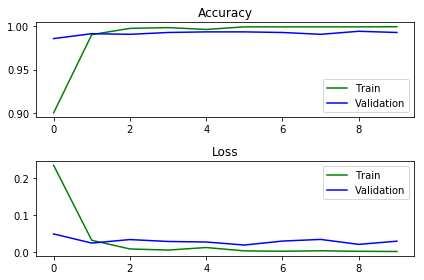

1418/1418 [==============================] - 0s 206us/step
Test score: 0.029, accuracy: 0.993
0	0	then snuck into brokeback mountain , which is the most depressing movie i have ever seen..
0	0	always knows what i want , not guy crazy , hates harry potter..
1	1	hell yea i love the mission impossible thing .
1	1	harry potter is awesome i do n't care if anyone says differently ! ..
0	0	mission impossible 2 sucked hardcore .


In [75]:

# 모델 작성
model = Sequential()
model.add(Embedding(vocab_size, EMBEDDING_SIZE, input_length=maxlen))
model.add(SpatialDropout1D(0.2))
model.add(LSTM(HIDDEN_LAYER_SIZE, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1))
model.add(Activation("sigmoid"))

model.compile(loss="binary_crossentropy", optimizer="adam", 
              metrics=["accuracy"])

history = model.fit(Xtrain, ytrain, batch_size=BATCH_SIZE, 
                    epochs=NUM_EPOCHS,
                    validation_data=(Xtest, ytest))

# 손실과 정확도 시각화
plt.subplot(211)
plt.title("Accuracy")
plt.plot(history.history["acc"], color="g", label="Train")
plt.plot(history.history["val_acc"], color="b", label="Validation")
plt.legend(loc="best")

plt.subplot(212)
plt.title("Loss")
plt.plot(history.history["loss"], color="g", label="Train")
plt.plot(history.history["val_loss"], color="b", label="Validation")
plt.legend(loc="best")

plt.tight_layout()
plt.show()

# 평가
score, acc = model.evaluate(Xtest, ytest, batch_size=BATCH_SIZE)
print("Test score: %.3f, accuracy: %.3f" % (score, acc))

for i in range(5):
    idx = np.random.randint(len(Xtest))
    xtest = Xtest[idx].reshape(1,42)
    ylabel = ytest[idx]
    ypred = model.predict(xtest)[0][0]
    sent = " ".join([index2word[x] for x in xtest[0].tolist() if x != 0])
    print("%.0f\t%d\t%s" % (ypred, ylabel, sent))

In [74]:
# 평가
score, acc = model.evaluate(Xtest, ytest, batch_size=BATCH_SIZE)
print("Test score: %.3f, accuracy: %.3f" % (score, acc))

for i in range(5):
    idx = np.random.randint(len(Xtest))
    xtest = Xtest[idx].reshape(1,42)
    ylabel = ytest[idx]
    ypred = model.predict(xtest)[0][0]
    sent = " ".join([index2word[x] for x in xtest[0].tolist() if x != 0])
    print("%.0f\t%d\t%s" % (ypred, ylabel, sent))

1418/1418 [==============================] - 0s 192us/step
Test score: 0.018, accuracy: 0.994
1	1	dudeee i loved brokeback mountain ! ! ! !
0	0	da vinci code sucks be ...
0	0	da vinci code sucked..
0	0	brokeback mountain was boring .
1	1	ok it 's time to update wow have n't updated for a long time ok so yeah watched over the hedge and mission impossible 3 awesome movies hammy rocks..
